In [1]:
import json


In [1]:
from pathlib import Path

from pytest import approx
from uncertainties.core import Variable
import quantify.data.handling as dh
from quantify.analysis import spectroscopy_analysis as sa
from quantify.analysis import base_analysis as ba
from quantify.utilities._tests_helpers import get_test_data_dir
from quantify.visualization import mpl_plotting as qpl
from importlib import reload
reload(qpl)
reload(sa)
reload(ba)
dh.set_datadir(get_test_data_dir())

tuid = "20210118-202044-211-58ddb0"
# a_obj = sa.ResonatorSpectroscopyAnalysis(tuid=tuid)


# Adaptive 2D

In [1]:
from quantify.measurement.control import MeasurementControl
import quantify.visualization.pyqt_plotmon as pqm
from quantify.visualization.instrument_monitor import InstrumentMonitor

In [2]:
from pathlib import Path
from os.path import join
from quantify.data.handling import get_datadir, set_datadir
set_datadir(join(Path.home(), 'quantify-data')) # change me!
print(f"Data will be saved in:\n{get_datadir()}")

Data will be saved in:
/Users/adriaanrol/quantify-data


In [3]:
MC = MeasurementControl('MC')
insmon = InstrumentMonitor("Instruments Monitor")
MC.instrument_monitor(insmon.name)
plotmon = pqm.PlotMonitor_pyqt('plotmon_MC')
MC.instr_plotmon(plotmon.name)

In [4]:
from qcodes.instrument.base import Instrument
from qcodes import ManualParameter, Parameter
from qcodes.utils import validators as vals
import time
import numpy as np

para = Instrument('parabola')

para.add_parameter('x', unit='m', label='X', parameter_class=ManualParameter)
para.add_parameter('y', unit='m', label='Y', parameter_class=ManualParameter)

para.add_parameter('noise', unit='V', label='white noise amplitude',
                       parameter_class=ManualParameter)
para.add_parameter('acq_delay', initial_value=.1, unit='s', parameter_class=ManualParameter)


def _amp_model():
    time.sleep(para.acq_delay())  # for display purposes, just so we can watch the live plot update
    return para.x() ** 2 + para.y() ** 2 + para.noise() * np.random.rand(1)


para.add_parameter('amp', unit='V', label='Amplitude', get_cmd=_amp_model)

In [6]:
from scipy import optimize

In [61]:
MC.settables([para.x, para.y])
af_pars = {
    "adaptive_function": optimize.minimize, # used by MC
    "x0": [-50, -50], # used by `optimize.minimize` (in this case)
    "method": "Nelder-Mead", # used by `optimize.minimize` (in this case)
    "options": {"maxfev": 100} # limit the maximum evaluations of the gettable(s)
}
para.noise(0.5)
MC.gettables(para.amp)
dset = MC.run_adaptive('nelder_mead_optimization', af_pars)

Running adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptivelyRunning adaptively
Running adaptively
Running adaptively
Running adaptively
Running adaptively
Running adaptively
Running adaptively
Running adaptively


In [62]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 101)
Coordinates:
    x0       (dim_0) float64 -50.0 -52.5 -50.0 -47.5 ... 0.1051 0.1039 0.1043
    x1       (dim_0) float64 -50.0 -50.0 -52.5 -52.5 ... 0.05352 0.05217 0.05263
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 5e+03 5.256e+03 5.256e+03 ... 0.0504 0.1302 0.0605
Attributes:
    tuid:     20210301-175815-786-59f977
    name:     nelder_mead_optimization
    2D-grid:  False

In [63]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 101)
Coordinates:
    x0       (dim_0) float64 -50.0 -52.5 -50.0 -47.5 ... 0.1051 0.1039 0.1043
    x1       (dim_0) float64 -50.0 -50.0 -52.5 -52.5 ... 0.05352 0.05217 0.05263
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 5e+03 5.256e+03 5.256e+03 ... 0.0504 0.1302 0.0605
Attributes:
    tuid:     20210301-175815-786-59f977
    name:     nelder_mead_optimization
    2D-grid:  False

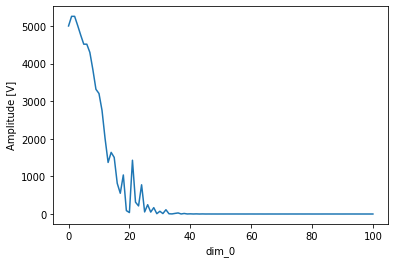

In [64]:
dset.y0.plot()

In [26]:
from quantify.data import handling as dh

In [44]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 101)
Coordinates:
    x0       (dim_0) float64 -50.0 -52.5 -50.0 -52.5 ... -0.2125 -0.2123 -0.2124
    x1       (dim_0) float64 -50.0 -50.0 -52.5 -47.5 ... 0.1062 0.1061 0.1062
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 5e+03 5.256e+03 5.257e+03 ... 0.523 0.2756 0.1426
Attributes:
    tuid:     20210228-153331-786-c7266c
    name:     nelder_mead_optimization
    2D-grid:  False

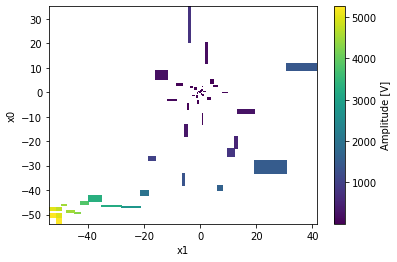

In [73]:
ind_dset = dset.set_index({"dim_0": ("x0", "x1")})
ind_dset
u_dset = ind_dset.unstack()
u_dset.y0.plot()

In [71]:
u_dset['x0']
u_dset['x1']
u_dset['y0']


<xarray.DataArray 'y0' (x0: 97, x1: 96)>
array([[          nan, 5256.43186184,           nan, ...,           nan,
                  nan,           nan],
       [5256.38848525, 5000.28440818,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan, 1429.96159848],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
  * x0       (x0) float64 -52.5 -50.0 -49.38 -48.75 ... 6.475 11.02 12.74 27.62
  * x1       (x1) float64 -52.5 -50.0 -48.75 -46.25 ... 13.09 13.35 25.16 36.17
Attributes:
    name:       amp
    long_name:  Amplitude
    units:      V
    batched:    False

In [51]:
u_dset['x0']
u_dset['x1']

<xarray.DataArray 'x1' (x1: 99)>
array([-5.250000e+01, -5.000000e+01, -4.875000e+01, -4.750000e+01,
       -4.625000e+01, -4.500000e+01, -4.250000e+01, -4.000000e+01,
       -3.625000e+01, -3.375000e+01, -3.125000e+01, -3.062500e+01,
       -1.937500e+01, -1.906250e+01, -8.437500e+00, -7.812500e+00,
       -7.187500e+00, -3.398438e+00, -2.343750e+00, -1.718750e+00,
       -1.289062e+00, -1.163940e+00, -1.161385e+00, -6.225586e-01,
       -4.361343e-01, -4.003906e-01, -1.648045e-01, -1.413417e-01,
       -7.095337e-02, -1.695767e-02,  1.402572e-02,  2.188418e-02,
        2.951741e-02,  4.500911e-02,  4.893834e-02,  5.090295e-02,
        5.188526e-02,  5.963111e-02,  6.835926e-02,  6.934157e-02,
        7.812500e-02,  8.581557e-02,  8.679788e-02,  8.778019e-02,
        8.876250e-02,  8.974480e-02,  9.170942e-02,  9.189869e-02,
        9.699950e-02,  1.012408e-01,  1.017319e-01,  1.039754e-01,
        1.049743e-01,  1.050971e-01,  1.053427e-01,  1.054124e-01,
        1.055659e-01,  1.059889e-01,  1.060960e-01,  1.061241e-01,
        1.061267e-01,  1.061522e-01,  1.061574e-01,  1.061776e-01,
        1.061917e-01,  1.062188e-01,  1.062286e-01,  1.062593e-01,
        1.063102e-01,  1.063416e-01,  1.063611e-01,  1.064225e-01,
        1.064532e-01,  1.064644e-01,  1.067100e-01,  1.067490e-01,
        1.072011e-01,  1.073405e-01,  1.074633e-01,  1.075247e-01,
        1.087078e-01,  1.129150e-01,  1.149470e-01,  1.159293e-01,
        1.226928e-01,  1.654639e-01,  2.003765e-01,  2.313599e-01,
        2.623433e-01,  4.022190e-01,  4.951692e-01,  6.040615e-01,
        6.542969e-01,  1.747284e+00,  2.070312e+00,  2.375488e+00,
        2.680664e+00,  4.062500e+00,  1.562500e+01])
Coordinates:
  * x1       (x1) float64 -52.5 -50.0 -48.75 -47.5 ... 2.375 2.681 4.062 15.62

In [52]:
u_dset['y0']

<xarray.DataArray 'y0' (x0: 97, x1: 99)>
array([[          nan, 5256.44676079,           nan, ...,           nan,
                  nan,           nan],
       [5256.67745555, 5000.38595514,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
         270.73453245,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan, 1107.22724525]])
Coordinates:
  * x0       (x0) float64 -52.5 -50.0 -48.75 -46.25 ... 7.188 9.219 15.94 29.38
  * x1       (x1) float64 -52.5 -50.0 -48.75 -47.5 ... 2.375 2.681 4.062 15.62
Attributes:
    name:       amp
    long_name:  Amplitude
    units:      V
    batched:    False

In [46]:
ind_dset['y0']

<xarray.DataArray 'y0' (dim_0: 101)>
array([5.00038596e+03, 5.25644676e+03, 5.25667746e+03, 5.01277811e+03,
       4.75626049e+03, 4.51603030e+03, 4.51606517e+03, 4.05049678e+03,
       3.61267745e+03, 3.62508301e+03, 2.81582701e+03, 2.11597293e+03,
       2.11589568e+03, 1.53247031e+03, 6.19751177e+02, 6.60811466e+01,
       1.03415684e+02, 1.10722725e+03, 2.70734532e+02, 4.83252720e+02,
       8.84249442e+01, 5.69387330e+00, 1.50465507e+01, 2.05337862e+02,
       2.77419918e+01, 4.09853594e+01, 1.62339959e+01, 9.38561107e-01,
       1.26487956e+01, 2.06619327e+01, 4.19800629e+00, 9.62658728e+00,
       1.55863669e+00, 3.08190843e+00, 7.03557559e-01, 4.98281101e+00,
       5.32144972e-01, 1.98763758e+00, 1.72541339e-01, 6.44283492e-01,
       4.80301911e-01, 4.91031447e-01, 2.93629560e-01, 1.13537353e+00,
       4.93656801e-01, 5.01421757e-01, 5.09940498e-01, 7.19287605e-01,
       1.53017876e-01, 1.31013159e-01, 3.26373275e-01, 1.33906647e-01,
       4.05207670e-01, 1.16136351e-01, 4.31645475e-01, 4.02298162e-01,
       5.29571613e-01, 2.25854688e-01, 2.18940276e-01, 3.30118025e-01,
       4.64059349e-01, 5.06134796e-01, 2.59112942e-01, 1.91020042e-01,
       1.70010890e-01, 1.12640402e-01, 2.27172881e-01, 1.39985844e-01,
       5.25872016e-01, 2.65925957e-01, 2.23987896e-01, 5.22381117e-01,
       1.57955187e-01, 2.36347610e-01, 4.32795385e-01, 3.52428465e-01,
       1.55243055e-01, 3.45165384e-01, 3.83962950e-01, 4.60224364e-01,
       5.52530649e-01, 3.58596507e-01, 1.38313655e-01, 5.68646299e-02,
       4.34127577e-01, 2.83134675e-01, 1.36837548e-01, 2.85419555e-01,
       4.59242190e-01, 5.52212841e-01, 1.61248125e-01, 3.59358807e-01,
       5.16378961e-01, 1.82114826e-01, 2.08765896e-01, 3.27654469e-01,
       1.74442297e-01, 2.74917690e-01, 5.22955775e-01, 2.75620191e-01,
       1.42559050e-01])
Coordinates:
  * dim_0    (dim_0) MultiIndex
  - x0       (dim_0) float64 -50.0 -52.5 -50.0 -52.5 ... -0.2125 -0.2123 -0.2124
  - x1       (dim_0) float64 -50.0 -50.0 -52.5 -47.5 ... 0.1062 0.1061 0.1062
Attributes:
    name:       amp
    long_name:  Amplitude
    units:      V
    batched:    False

In [25]:
dset_exp = dset.expand_dims("dim_1")
dset.ass
dset_exp

AttributeError: 'Dataset' object has no attribute 'ass'

In [16]:
dset.stack(z=("x0", "x1"))

KeyError: 'x0'

In [6]:
import numpy as np

In [7]:
from quantify.data.handling import to_gridded_dataset
from quantify.visualization import SI_utilities

In [8]:
reload(SI_utilities)

<module 'quantify.visualization.SI_utilities' from '/Users/adriaanrol/GitHubRepos/Professional/quantify-core/quantify/visualization/SI_utilities.py'>

In [9]:
reload(ba)
reload(qpl)


a_obj = ba.Basic1DAnalysis(tuid=tuid)

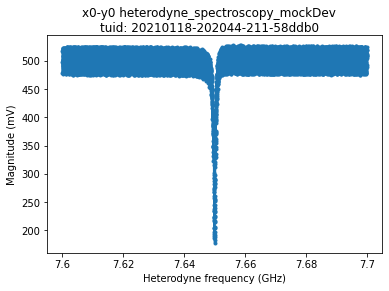

In [10]:
fig = a_obj.figs_mpl['Line plot x0-y0']
fig

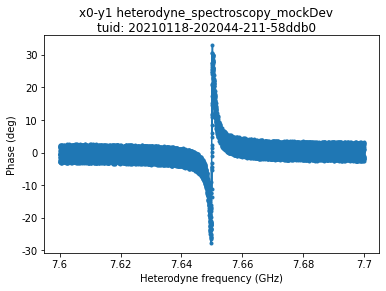

In [11]:
a_obj.figs_mpl['Line plot x0-y1']

In [12]:
def adjust_axeslabels_SI(axis)-> None:
    """
    Auto adjust the labels of a plot generated by Xarray to SI-unit aware labels.
    """
    xlabel = ax.get_xlabel()
    # extract unit 
    xunit = xlabel[xlabel.find("[")+1:xlabel.find("]")]
    xlabel = xlabel[:-(len(xunit)+3)]
    # replace by a unit aware label formatter 
    qpl.set_xlabel(ax, xlabel, xunit)
    
    yunit = ylabel[ylabel.find("[")+1:ylabel.find("]")]
    ylabel = ylabel[:-(len(yunit)+3)]
    # replace by a unit aware label formatter 
    qpl.set_ylabel(ax, ylabel, yunit)



In [13]:
ax = fig.get_axes()[0]
# ax.get_xlabel()

## Two D analysis

In [14]:
TUID_2D_2PLOTS = "20210126-162726-170-de4f78"
a_obj = ba.Basic2DAnalysis(tuid=TUID_2D_2PLOTS)

In [16]:
TUID_2D_2PLOTS = "20210126-162726-170-de4f78"
a_obj = ba.Basic2DAnalysis(tuid=TUID_2D_2PLOTS)

In [15]:
from IPython.display import display


In [216]:
reload(ba)
TUID_2D_2PLOTS = "20210227-172939-723-53d82c"
# TUID_2D_2PLOTS = "20210126-162726-170-de4f78"
import time
ba.settings['DPI']=450
ba.settings["fig_formats"]= ("png", "svg",)
t0 = time.time()
a_obj = ba.Basic2DAnalysis(tuid=TUID_2D_2PLOTS)
t1 = time.time()
print(t1-t0)


ba.settings["fig_formats"]= ()
t0 = time.time()
a_obj = ba.Basic2DAnalysis(tuid=TUID_2D_2PLOTS)
t1 = time.time()
print(t1-t0)

4.472598075866699
0.16684889793395996


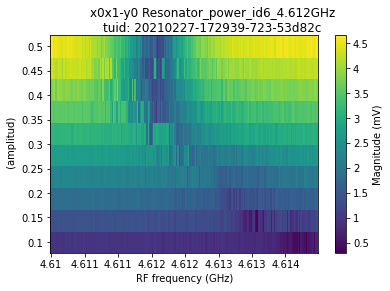

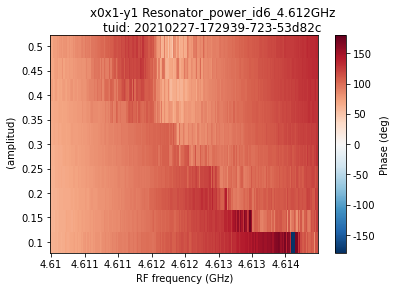

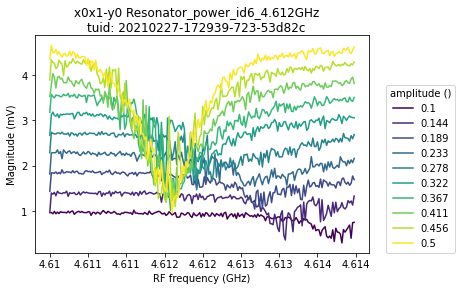

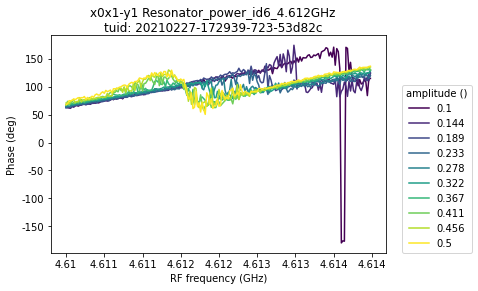

In [214]:
a_obj.display_figs_mpl()

In [219]:
ba.settings

{'DPI': 450,
 'fig_formats': (),
 'presentation_mode': False,
 'transparent_background': False}

In [226]:
with?

Object `with` not found.


In [225]:
x = ba.settings["fig_formats"] 
with 5 as x:
    print(ba.settings)
    # a_obj = ba.Basic2DAnalysis(tuid=TUID_2D_2PLOTS)



AttributeError: __enter__

In [217]:
from quantify.analysis.fitting_models import ResonatorModel

In [27]:
dset_gr = dh.to_gridded_dataset(a_obj.dataset_raw)

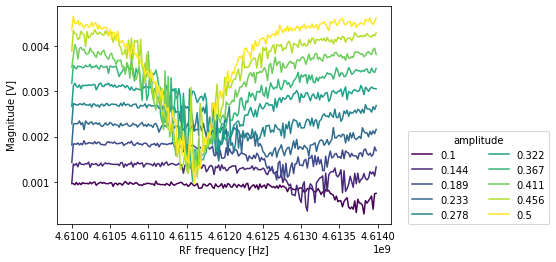

In [141]:
import matplotlib
import matplotlib.pyplot as plt
f, ax=plt.subplots()

lines = dset_gr.y0.plot.line(x='x0', hue='x1', ax=ax)
# Change the color and labels of the line as we want to tweak this with respect to xarray default. 
for line, zv in zip(lines, np.array(dset_gr['x1'])):
    cmap = matplotlib.cm.get_cmap()
    norm = matplotlib.colors.Normalize(vmin=np.min(dset_gr['x1']), vmax=np.max(dset_gr['x1']))
    line.set_color(cmap(norm(zv)))
    line.set_label(f"{zv:.3g}")
    
ax.legend(loc=(1.05, .0), title=dset_gr['x1'].attrs['long_name'], ncol=2)


In [114]:
'Spectral'

'Spectral'

In [ ]:
cmap.

In [97]:
cmap(0)

(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)

In [229]:
reload(ba)
reload(sa)

<module 'quantify.analysis.spectroscopy_analysis' from '/Users/adriaanrol/GitHubRepos/Professional/quantify-core/quantify/analysis/spectroscopy_analysis.py'>

In [231]:
%xmode

Exception reporting mode: Verbose


## resonator analysis

In [3]:
from quantify.analysis import fitting_models as fit_mods
# reload(fit_mods)
# reload(sa)

In [8]:
%xmode

Exception reporting mode: Context


In [3]:
TUID_RES= "20210227-174714-680-31df85"
# a_obj= sa.ResonatorSpectroscopyAnalysis(tuid=TUID_RES)
a_obj= sa.ResonatorSpectroscopyAnalysis(tuid=TUID_RES, interrupt_after="save_quantities_of_interest")

/usr/local/lib/python3.8/site-packages/asteval/astutils.py:226: RuntimeWarning: divide by zero encountered in double_scalars
  ast.Div: lambda a, b: a / b,


In [4]:
a_obj.dataset_raw

<xarray.Dataset>
Dimensions:  (dim_0: 200)
Coordinates:
    x0       (dim_0) float64 4.658e+09 4.658e+09 ... 4.662e+09 4.662e+09
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 0.001109 0.001105 0.00109 ... 0.001132 0.001114
    y1       (dim_0) float64 16.77 16.61 18.36 18.37 ... 76.97 79.31 77.11 76.03
Attributes:
    2D-grid:  False
    name:     Resonator_id7_4.660GHz
    tuid:     20210227-174714-680-31df85

In [6]:
type(a_obj.dataset_raw.x0.attrs['batched'])

numpy.bool_

In [11]:

import numpy as np 
isinstance(True, np.bool)

True

In [17]:
type(np.bool_)

type

In [ ]:
from logging import 

In [5]:
a_obj.dataset.x0.attrs

{'batched': False, 'long_name': 'RF frequency', 'name': 'freq', 'units': 'Hz'}

In [15]:
value=True

isinstance(value, (bool, str, np.ndarray, np.number, list, tuple))


True

In [6]:
a_obj.save_processed_dataset()

TypeError: Invalid value for attr 'batched': False must be a number, a string, an ndarray or a list/tuple of numbers/strings for serialization to netCDF files

In [6]:
a_obj.dataset.to_netcdf(path='.', engine="h5netcdf", invalid_netcdf=True)

TypeError: Invalid value for attr 'batched': False must be a number, a string, an ndarray or a list/tuple of numbers/strings for serialization to netCDF files

In [18]:
a_obj.dataset

<xarray.Dataset>
Dimensions:  (x0: 200)
Coordinates:
  * x0       (x0) float64 4.658e+09 4.658e+09 4.658e+09 ... 4.662e+09 4.662e+09
Data variables:
    S21      (x0) complex128 (0.0010617445732747862+0.0003200271581082585j) ....

In [19]:
a_obj.dataset_raw

<xarray.Dataset>
Dimensions:  (dim_0: 200)
Coordinates:
    x0       (dim_0) float64 4.658e+09 4.658e+09 ... 4.662e+09 4.662e+09
Dimensions without coordinates: dim_0
Data variables:
    y0       (dim_0) float64 0.001109 0.001105 0.00109 ... 0.001132 0.001114
    y1       (dim_0) float64 16.77 16.61 18.36 18.37 ... 76.97 79.31 77.11 76.03
Attributes:
    2D-grid:  False
    name:     Resonator_id7_4.660GHz
    tuid:     20210227-174714-680-31df85

In [20]:
a_obj.dataset

<xarray.Dataset>
Dimensions:  (x0: 200)
Coordinates:
  * x0       (x0) float64 4.658e+09 4.658e+09 4.658e+09 ... 4.662e+09 4.662e+09
Data variables:
    S21      (x0) complex128 (0.0010617445732747862+0.0003200271581082585j) ....

In [26]:
fr = a_obj.fit_res['hanger_func_complex_SI']

In [28]:
fr.params

name,value,standard error,relative error,initial value,min,max,vary,expression
fr,4.6595e+09,1298254.69,(0.03%),4659860000.0,4.6580e+09,4.6620e+09,True,
Ql,1557.84457,1352.24879,(86.80%),5222.955614520985,117.081910,232993.000,True,
Qe,6103.34562,8550.95065,(140.10%),5222.955614520985,0.00000000,inf,True,
A,0.00103585,2.1085e-04,(20.35%),0.0009200920160654009,0.00000000,inf,True,
theta,0.33359498,1.40104463,(419.98%),0,-1.57079633,1.57079633,True,
phi_v,7.5346e-08,6.8659e-08,(91.13%),0,-inf,inf,True,
phi_0,1.60572491,319.983426,(19927.66%),0,-inf,inf,True,
alpha,0.99322486,337.899729,(34020.47%),0,-1.00000000,1.00000000,True,
Qi,2052.96428,1438.11990,(70.05%),inf,-inf,inf,False,1./(1./Ql-1./Qe*cos(theta))
Qc,6459.44648,9576.03053,(148.25%),5222.955614520985,-inf,inf,False,Qe/cos(theta)


In [ ]:
f

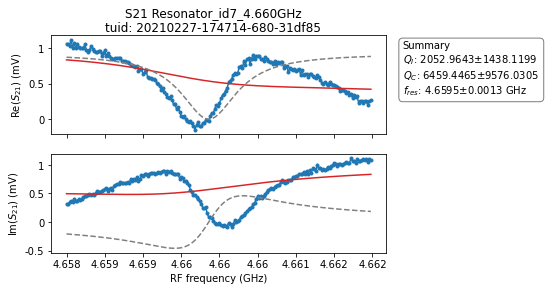

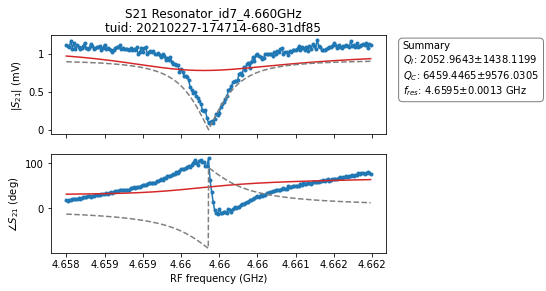

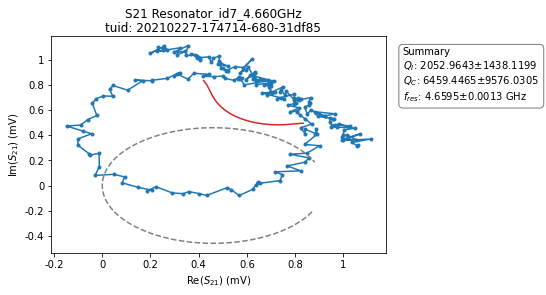

In [21]:
a_oparamscreate_figures()

In [7]:
a_obj.display_figs_mpl()

In [92]:
lines[0].set_label()


'_line0'

In [63]:
lines

In [55]:
leg = ax.get_legend()

In [ ]:
leg.set_po

In [205]:
display?

Signature:
display(
    *objs,
    include=None,
    exclude=None,
    metadata=None,
    transient=None,
    display_id=None,
    **kwargs,
)
Docstring:
Display a Python object in all frontends.

By default all representations will be computed and sent to the frontends.
Frontends can decide which representation is used and how.

In terminal IPython this will be similar to using :func:`print`, for use in richer
frontends see Jupyter notebook examples with rich display logic.

Parameters
----------
objs : tuple of objects
    The Python objects to display.
raw : bool, optional
    Are the objects to be displayed already mimetype-keyed dicts of raw display data,
    or Python objects that need to be formatted before display? [default: False]
include : list, tuple or set, optional
    A list of format type strings (MIME types) to include in the
    format data dict. If this is set *only* the format types included
    in this list will be computed.
exclude : list, tuple or set, optional
  

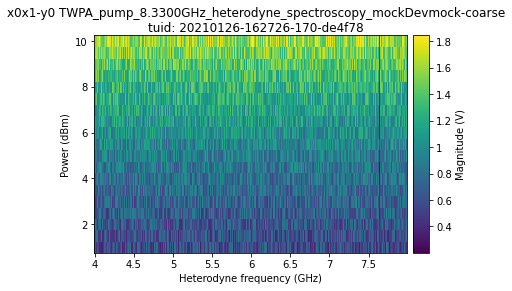

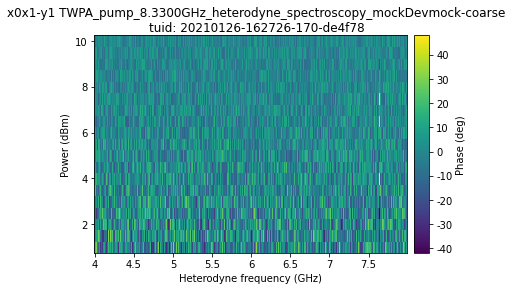

In [204]:
for f in a_obj.figs_mpl.values():
    display(f)

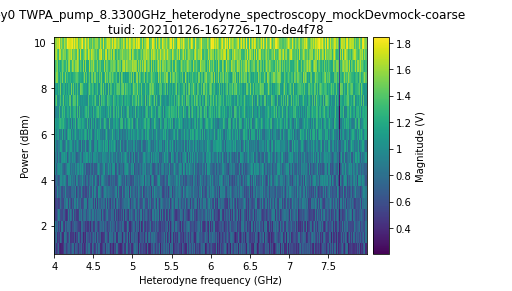

In [102]:
a_obj.figs_mpl['Heatmap x0x1-y0']

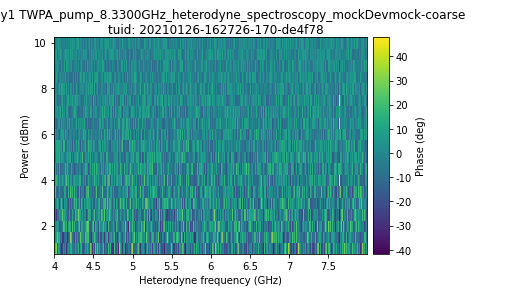

In [103]:
a_obj.figs_mpl['Heatmap x0x1-y1']

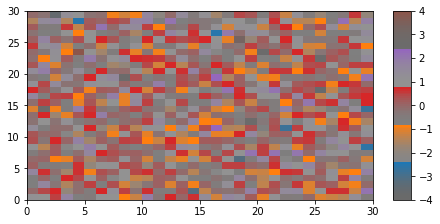

In [198]:
        from quantify.visualization.color_utilities import set_hlsa
        import matplotlib.pyplot as plt
        import colorsys
        import matplotlib.colors as mplc
        import numpy as np

        color_cycle = [
            'C0',
            'C1',
            'C3',
            'C4',
            'C5',
            # '#ff7f0e',
            # '#2ca02c',
            # '#d62728'
        ]
        all_colors = []
        for col in color_cycle: #[:2]:
            hls = colorsys.rgb_to_hls(*mplc.to_rgb(mplc.to_rgb(col)))
            sat_vals = (np.linspace(0., 1.0, 20) ** 2) * hls[2]
            # alpha_vals = np.linspace(0.4, 1.0, 20)
            alpha_vals=np.ones(20)

            colors = [list(set_hlsa(col, s=s)) for s, a in zip(sat_vals, alpha_vals)]
            all_colors += colors

        cmap = mplc.ListedColormap(all_colors)

        np.random.seed(19680801)
        data = np.random.randn(30, 30)

        fig, ax = plt.subplots(1, 1, figsize=(6, 3), constrained_layout=True)

        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)


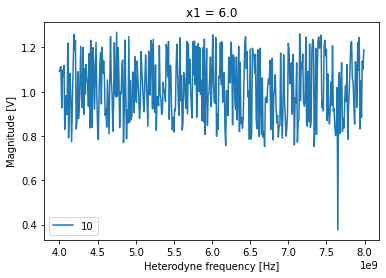

In [167]:
gridded_dataset.isel({"x1":10}).y0.plot(label='10')
plt.legend()

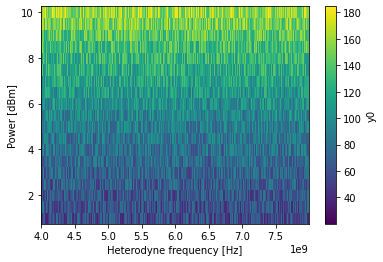

In [149]:
(gridded_dataset.y0.transpose()*100).plot()

In [154]:
yvals = gridded_dataset.y0

In [199]:
yvals

<xarray.DataArray 'y0' (x0: 400, x1: 19)>
array([[0.7376475 , 0.57034999, 0.73284805, ..., 1.5492174 , 1.28859914,
        1.82133451],
       [0.64978339, 0.65367171, 0.75475769, ..., 1.26435499, 1.44238729,
        1.63011052],
       [0.64864629, 0.65992278, 0.8648932 , ..., 1.32570663, 1.57848443,
        1.55593361],
       ...,
       [0.79552678, 0.49024505, 0.54624696, ..., 1.22863334, 1.59014727,
        1.60182416],
       [0.56688358, 0.68812882, 0.57437044, ..., 1.61411048, 1.43259981,
        1.41198089],
       [0.37979025, 0.84087297, 0.85242621, ..., 1.32411988, 1.39898851,
        1.52703224]])
Coordinates:
  * x0       (x0) float64 4e+09 4.01e+09 4.02e+09 ... 7.97e+09 7.98e+09 7.99e+09
  * x1       (x1) float64 1.0 1.5 2.0 2.5 3.0 3.5 ... 7.5 8.0 8.5 9.0 9.5 10.0
Attributes:
    name:       magn
    long_name:  Magnitude
    units:      V

AttributeError: 'QuadMesh' object has no property 'style'

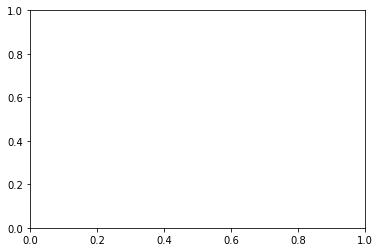

In [158]:
yvals.plot(style='line')

In [ ]:
set_cbarlabel

In [153]:
gridded_dataset.y0.long_name

'Magnitude'

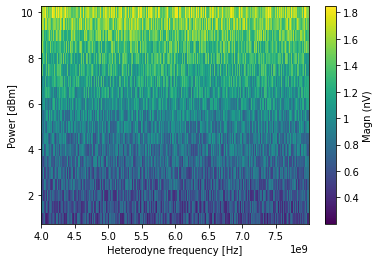

In [151]:
import matplotlib.pyplot as plt
f, ax=plt.subplots()
qm = gridded_dataset.y0.transpose().plot(ax =ax)

set_cbarlabel(qm.colorbar, 'Magn', 'V')

In [140]:
ax.get_images()

<a list of 0 AxesImage objects>

In [137]:
im = ax.get_images()

In [138]:
im

<a list of 0 AxesImage objects>

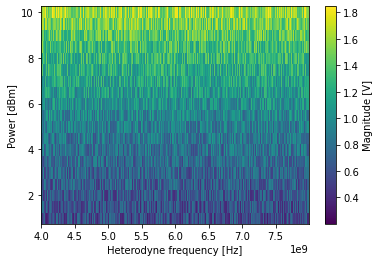

In [133]:
set_cbarlabel(qm, 'test')
f

In [121]:
from quantify.visualization.SI_utilities import set_cbarlabel

In [127]:
f.get_axes()[0]

<AxesSubplot:xlabel='Heterodyne frequency [Hz]', ylabel='Power [dBm]'>

In [126]:
set_cbarlabel(f.get_axes()[1], 'test', unit='Hz')
f

AttributeError: 'AxesSubplot' object has no attribute 'get_ticks'

In [120]:
f.get_axes()

[<AxesSubplot:xlabel='Heterodyne frequency [Hz]', ylabel='Power [dBm]'>,
 <AxesSubplot:label='<colorbar>', ylabel='Magnitude [V]'>]

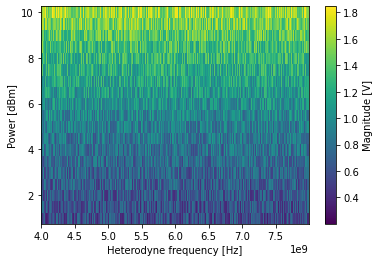

In [129]:
gridded_dataset = dh.to_gridded_dataset(a_obj.dataset_raw)
QM = gridded_dataset.transpose().y0.plot()

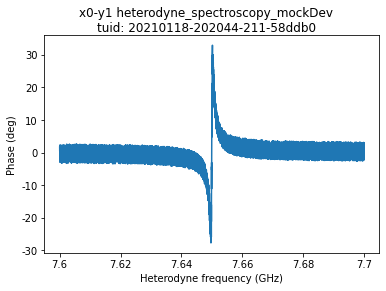

In [33]:
a_obj.figs_mpl['Line plot x0-y1']

In [36]:
gridded_dataset = to_gridded_dataset(a_obj.dataset_raw)

In [40]:
for keys, vals in gridded_dataset.data_vars.items():
    vals

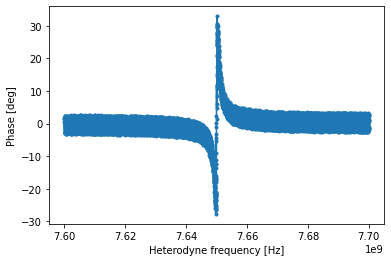

In [43]:
vals.plot(marker='.')

In [23]:
to_gridded_dataset?

Signature:
to_gridded_dataset(
    quantify_dataset: 'xr.Dataset',
    dimension: 'str' = 'dim_0',
    coords_names: 'Iterable' = None,
)
Docstring:
Converts a flattened (a.k.a. "stacked") dataset as the one generated by the :func:`~initialize_dataset`
to a dataset in which the measured values are mapped onto a grid in the `xarray` format.

This will be meaningful only if the data itself corresponds to a gridded measurement.

.. note:: Each individual :code:`(x0[i], x1[i], x2[i], ...)` setpoint must be unique.

Conversions applied:

- The names :code:`"x0", "x1", ...` will correspond to the names of the Dimensions.
- The unique values for each of the :code:`x0, x1, ...` Variables are converted to Coordinates.
- The :code:`y0, y1, ...` Variables are reshaped into a (multi-)dimensional grid and associated to the Coordinates.

.. seealso:: :meth:`~quantify.measurement.MeasurementControl.setpoints_grid`

Parameters
----------
quantify_dataset
    input dataset in the format generated by th

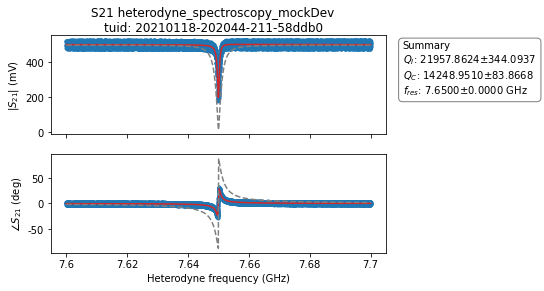

In [20]:
fs[1]

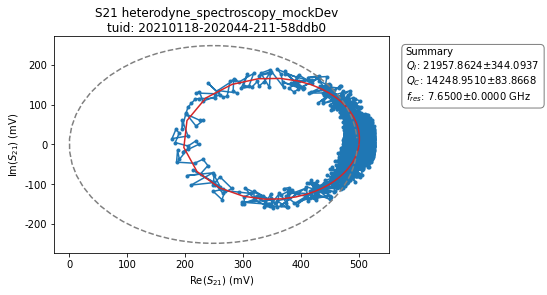

In [21]:
ax = fs[2].get_axes()[0]
fs[2]



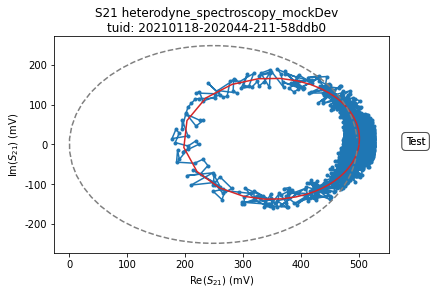

In [87]:
text = 'Test'
box_props = dict(boxstyle='round', pad=.4, facecolor='white', alpha=0.5)
ax.text(1.05, .5,text, transform=ax.transAxes, bbox=box_props)
fs[2]

In [81]:
a_obj.figs_mpl

OrderedDict([('S21-RealImag', <Figure size 432x288 with 2 Axes>),
             ('S21-MagnPhase', <Figure size 432x288 with 2 Axes>),
             ('S21-complex', <Figure size 432x288 with 1 Axes>)])

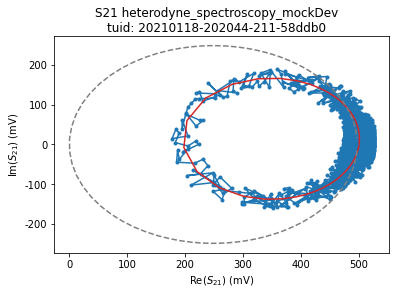

In [70]:
f



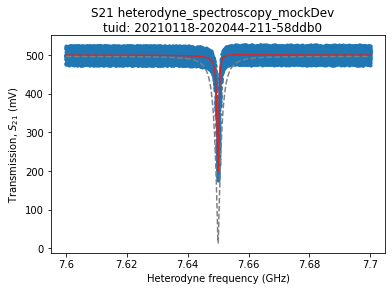

In [3]:
a_obj.figs_mpl['S21']

In [4]:
ds = a_obj.dataset

<AxesSubplot:xlabel='Heterodyne frequency (GHz)', ylabel='Im$(S_{21})$ (mV)'>

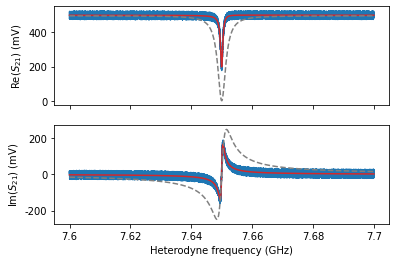

In [29]:
import matplotlib.pyplot as plt
import quantify.visualization.mpl_plotting as qpl

f, axs =plt.subplots(2,1, sharex=True)

ds.S21.real.plot(ax=axs[0])
ds.S21.imag.plot(ax=axs[1])

qpl.plot_fit(
            ax=axs[0], fit_res=a_obj.fit_res["hanger_func_complex_SI"], plot_init=True, 
            range_casting='real'
        )

qpl.plot_fit(
            ax=axs[1], fit_res=a_obj.fit_res["hanger_func_complex_SI"], plot_init=True, 
            range_casting='imag'
        )

qpl.set_ylabel(axs[0], r'Re$(S_{21})$', ds['S21'].units)
qpl.set_ylabel(axs[1], r'Im$(S_{21})$', ds['S21'].units)
axs[0].set_xlabel( '')
qpl.set_xlabel(axs[1], ds['x0'].long_name, ds['x0'].units)


In [15]:
ax=axs[0]
ax.get_xlabel()

'Heterodyne frequency [Hz]'

In [16]:
ax.get_xlim()

(7595000500.0, 7704989500.0)

In [89]:
reload(qpl)

<module 'quantify.visualization.mpl_plotting' from '/Users/adriaanrol/GitHubRepos/Professional/quantify-core/quantify/visualization/mpl_plotting.py'>

In [98]:
import quantify.visualization.SI_utilities as si
reload(si)
from quantify.visualization.SI_utilities import format_value_string

In [100]:
fr

In [101]:
fr = a_obj.fit_res['hanger_func_complex_SI']
format_value_string(r"$Q_I$", fr.params['Qi'])
format_value_string(r"$Q_C$", fr.params['Qc'])
format_value_string(r"$f_{res}$", fr.params['fr'], unit='Hz')



'$f_{res}$: 7.6500$\\pm$0.0000 GHz'

In [102]:
format_value_string?

Signature: format_value_string(par_name: str, lmfit_par, end_char='', unit=None)
Docstring:
Format an lmfit par to a  string of value with uncertainty.

Parameters
----------
par_name :
    the name of the parameter to use in the string
lmfit_par :
    an lmfit Parameter object. The value and stderr of this parameter
    will be used.
end_char :
    A character that will be put at the end of the line.
unit :
    a unit. If this is an SI unit it will be used in automatically
    determining a prefix for the unit and rescaling accordingly.
File:      ~/GitHubRepos/Professional/quantify-core/quantify/visualization/SI_utilities.py
Type:      function


In [88]:
a_obj.quantities_of_interest

OrderedDict([('Qi', 21957.862390692786+/-344.09371252399114),
             ('Qe', 14184.204913339152+/-83.10600055305275),
             ('Ql', 8641.370953904587+/-70.81661423802639),
             ('Qc', 14248.951022382165+/-83.86684477263084),
             ('fr', 7649998552.212877+/-3660.7298498678956),
             ('fit_res',
              OrderedDict([('hanger_func_complex_SI',
                            OrderedDict([('success', True),
                                         ('message', 'Fit succeeded.'),
                                         ('params',
                                          {'fr': {'name': 'fr',
                                            'user_data': None,
                                            'init_value': 7650000000.0,
                                            'min': 7600000000.0,
                                            'max': 7699990000.0,
                                            'brute_step': None,
                                       

In [20]:
a_obj.dset

<xarray.Dataset>
Dimensions:  (dim_0: 10000)
Dimensions without coordinates: dim_0
Data variables:
    S21      (dim_0) complex128 (0.5172021988794974+0.015185924354776085j) .....
    x0       (dim_0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09

In [27]:
ed_dset

<xarray.Dataset>
Dimensions:  (dim_0: 10000)
Coordinates:
    x0       (dim_0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09
Dimensions without coordinates: dim_0
Data variables:
    S21      (dim_0) complex128 (0.5172021988794974+0.015185924354776085j) .....

In [30]:
ed_dset = a_obj.dset.set_coords('x0')
ed_dset = ed_dset.swap_dims({"dim_0": "x0"})

In [43]:
S21 = ed_dset.S21

In [51]:
import numpy as np 
np.abs(S21)
np.real(S21)
# np.imag(S21)
# np.angle(S21)

<xarray.DataArray 'S21' (x0: 10000)>
array([0.5172022 , 0.49820741, 0.4779496 , ..., 0.50763139, 0.50373239,
       0.50994026])
Coordinates:
  * x0       (x0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09
Attributes:
    name:       S21
    units:      V
    long_name:  Transmission, $S_{21}$

In [52]:
getattr(np, 'abs')

<ufunc 'absolute'>

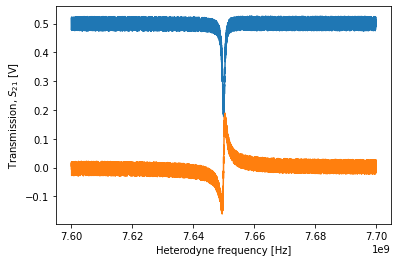

In [36]:
ed_dset.S21.real.plot()


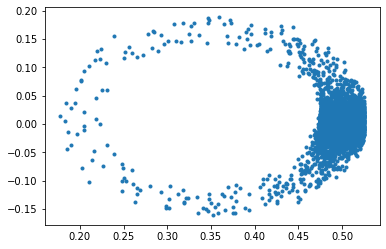

In [42]:
import matplotlib.pyplot as plt
f, ax=plt.subplots()
ax.plot(ed_dset.S21.real, ed_dset.S21.imag, '.')

In [35]:
a_obj.dset

<xarray.Dataset>
Dimensions:  (dim_0: 10000)
Dimensions without coordinates: dim_0
Data variables:
    S21      (dim_0) complex128 (0.5172021988794974+0.015185924354776085j) .....
    x0       (dim_0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09

In [24]:
ed_dset

<xarray.Dataset>
Dimensions:  (dim_0: 10000)
Coordinates:
    x0       (dim_0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09
Dimensions without coordinates: dim_0
Data variables:
    S21      (dim_0) complex128 (0.5172021988794974+0.015185924354776085j) .....

In [23]:
ed_dset.set_index({"x0": "x0"})

<xarray.Dataset>
Dimensions:  (dim_0: 10000, x0: 10000)
Dimensions without coordinates: dim_0, x0
Data variables:
    S21      (dim_0) complex128 (0.5172021988794974+0.015185924354776085j) .....
    x0       (x0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09

In [12]:
a_obj.dset.set_coords('x0')
a_obj.dset.set_index?

Signature:
a_obj.dset.set_index(
    indexes: Mapping[Hashable, Union[Hashable, Sequence[Hashable]]] = None,
    append: bool = False,
    inplace: bool = None,
    **indexes_kwargs: Union[Hashable, Sequence[Hashable]],
) -> 'Dataset'
Docstring:
Set Dataset (multi-)indexes using one or more existing coordinates
or variables.

Parameters
----------
indexes : {dim: index, ...}
    Mapping from names matching dimensions and values given
    by (lists of) the names of existing coordinates or variables to set
    as new (multi-)index.
append : bool, optional
    If True, append the supplied index(es) to the existing index(es).
    Otherwise replace the existing index(es) (default).
**indexes_kwargs: optional
    The keyword arguments form of ``indexes``.
    One of indexes or indexes_kwargs must be provided.

Returns
-------
obj : Dataset
    Another dataset, with this dataset's data but replaced coordinates.

Examples
--------
>>> arr = xr.DataArray(
...     data=np.ones((2, 3)),
...     d

In [8]:
dh.to_gridded_dataset??

Signature:
dh.to_gridded_dataset(
    quantify_dataset: 'xr.Dataset',
    dimension: 'str' = 'dim_0',
    coords_names: 'Iterable' = None,
)
Source:   
def to_gridded_dataset(
    quantify_dataset: xr.Dataset,
    dimension: str = "dim_0",
    coords_names: Iterable = None,
):
    """
    Converts a flattened (a.k.a. "stacked") dataset as the one generated by the :func:`~initialize_dataset`
    to a dataset in which the measured values are mapped onto a grid in the `xarray` format.

    This will be meaningful only if the data itself corresponds to a gridded measurement.

    .. note:: Each individual :code:`(x0[i], x1[i], x2[i], ...)` setpoint must be unique.

    Conversions applied:

    - The names :code:`"x0", "x1", ...` will correspond to the names of the Dimensions.
    - The unique values for each of the :code:`x0, x1, ...` Variables are converted to Coordinates.
    - The :code:`y0, y1, ...` Variables are reshaped into a (multi-)dimensional grid and associated to the Coordinat

In [7]:
dh.to_gridded_dataset(a_obj.dset)

<xarray.Dataset>
Dimensions:  (x0: 10000)
Coordinates:
  * x0       (x0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09
Data variables:
    S21      (x0) complex128 (0.5172021988794974+0.015185924354776085j) ... (...

In [6]:
a_obj.dset_raw

<xarray.Dataset>
Dimensions:  (dim_0: 10000)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 7.6e+09 7.6e+09 7.6e+09 ... 7.7e+09 7.7e+09 7.7e+09
    y0       (dim_0) float64 0.5174 0.4983 0.478 0.4984 ... 0.5077 0.5039 0.5104
    y1       (dim_0) float64 1.682 1.31 0.4424 2.295 ... 1.24 1.083 -1.508 2.297
Attributes:
    tuid:     20210118-202044-211-58ddb0
    name:     heterodyne_spectroscopy_mockDev
    2D-grid:  0